In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Data cleaning

In [99]:
## chck missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [100]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [101]:
## fix extra spaces 
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [102]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Data analysis

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [104]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [105]:
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [106]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [107]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [108]:
print(df['education'].unique())
print(df['self_employed'].unique())
print(df['loan_status'].unique())

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [109]:
df['education'] = df['education'].astype(str).str.strip().str.title()
df['self_employed'] = df['self_employed'].astype(str).str.strip().str.title()
df['loan_status'] = df['loan_status'].astype(str).str.strip().str.title()


In [110]:
df['education']=df['education'].map({"Graduate":1,"Not Graduate":0})
df['self_employed']=df['self_employed'].map({"Yes":1,"No":0})
df['loan_status']=df['loan_status'].map({"Approved":1,"Rejected":0})

In [111]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


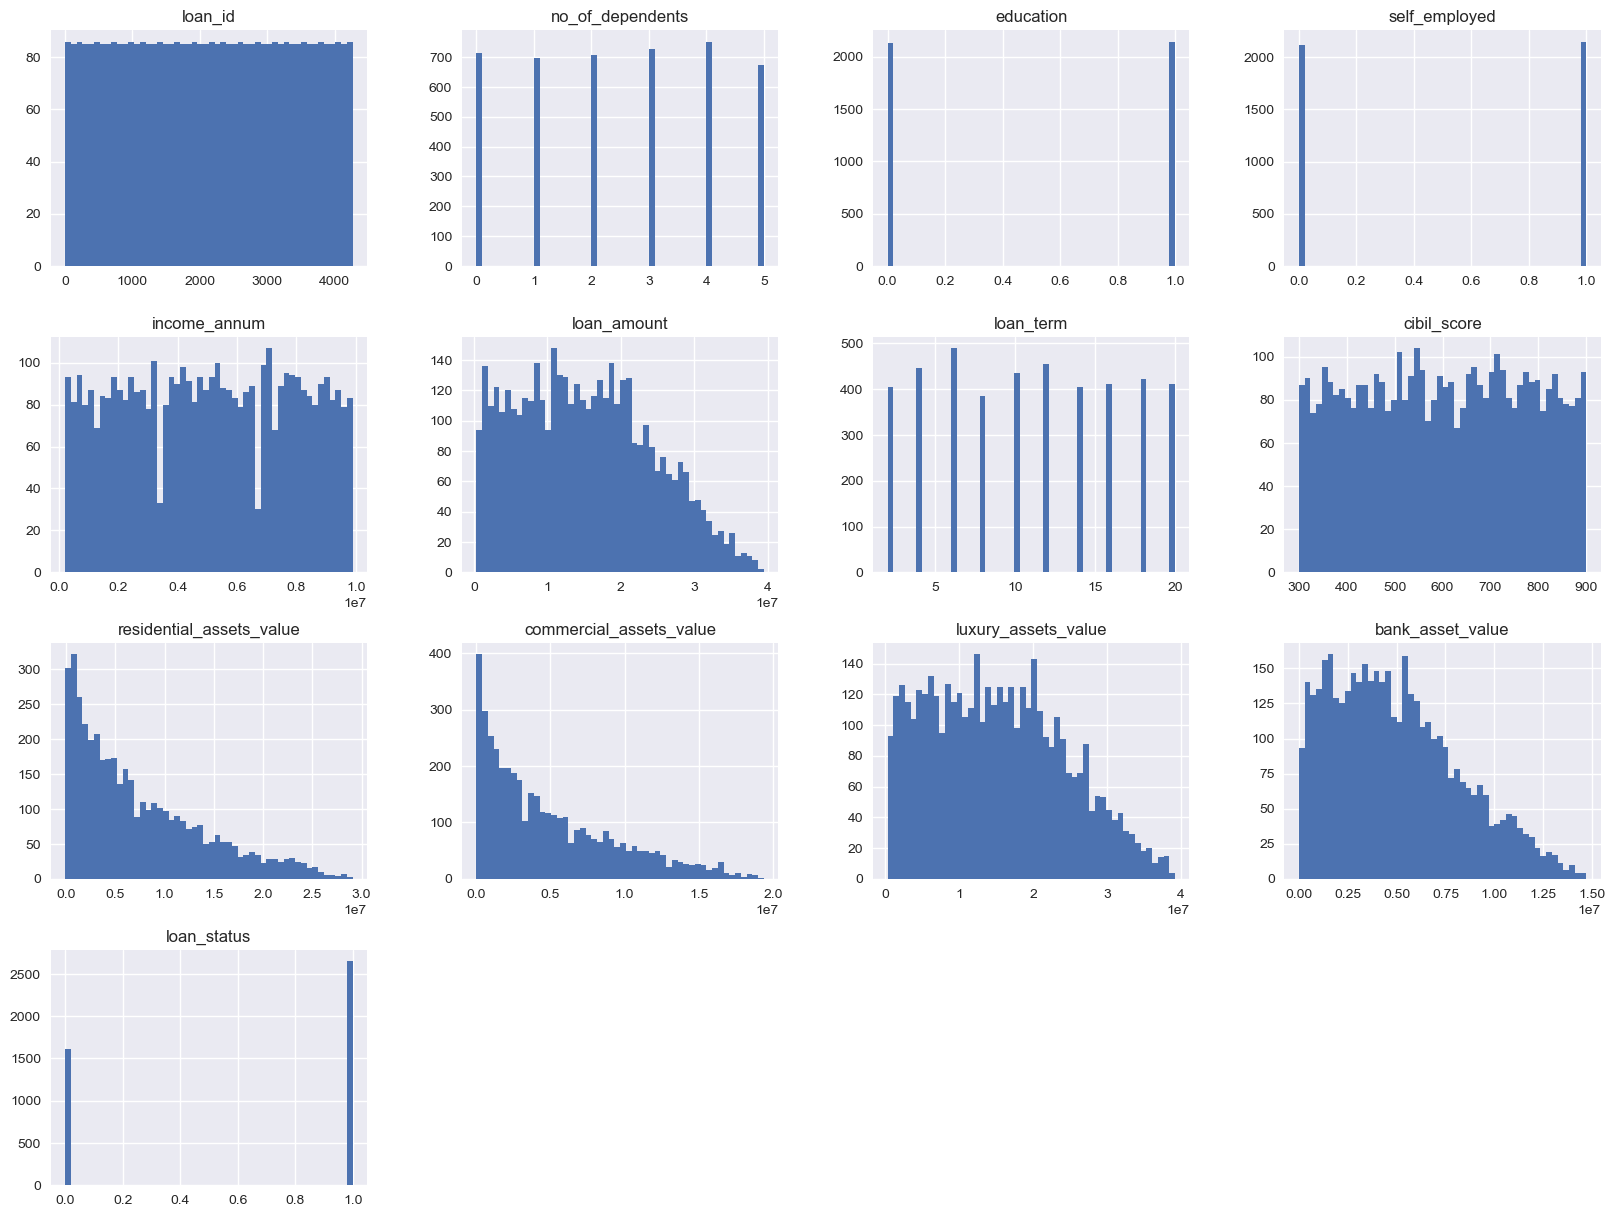

In [113]:
### Plot density plot for all features
plt.style.use('seaborn-v0_8')  
df.hist(bins=50,figsize=(20,15))
plt.show()

In [114]:
df.corr()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.017685
no_of_dependents,0.005326,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,0.015536,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,0.004918
self_employed,0.001745,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.012592,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,0.008170,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,0.009809,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,0.016323,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.020936,0.007376,0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,0.018595,-0.001531,-0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246


In [118]:
df=df.drop(['loan_id'],axis=1)

In [119]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [120]:
df.to_csv("cleaned_loan_dataset.csv",index=False)